In [4]:
import yfinance as yahooFinance

GetFacebookInformation = yahooFinance.Ticker("META")
print(GetFacebookInformation.history(period="1d",interval="1m"))

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-27 09:30:00-05:00  574.890015  574.979980  572.711914  572.711914   
2024-11-27 09:31:00-05:00  572.609985  574.000000  571.700012  573.400024   
2024-11-27 09:32:00-05:00  573.050110  573.630005  572.090027  572.090027   
2024-11-27 09:33:00-05:00  572.309998  572.679871  571.370178  571.640015   
2024-11-27 09:34:00-05:00  571.526917  572.469910  571.500000  572.000000   
...                               ...         ...         ...         ...   
2024-11-27 15:55:00-05:00  567.885010  568.419983  567.874573  568.315002   
2024-11-27 15:56:00-05:00  568.315002  568.729980  568.250000  568.655029   
2024-11-27 15:57:00-05:00  568.590027  568.989990  568.580017  568.979980   
2024-11-27 15:58:00-05:00  568.849976  569.320007  568.754211  569.239990   
2024-11-27 15:59:00-05:00  569.200012  569.494995  569.080078  569.440002   

In [2]:
GetFacebookInformation

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Datetime,,,,,,
2024-11-24 23:00:00+00:00,2709.399902,2709.399902,2717.899902,2690.000000,2716.899902,0
2024-11-24 23:01:00+00:00,2708.000000,2708.000000,2710.899902,2708.000000,2709.100098,277
2024-11-24 23:02:00+00:00,2708.500000,2708.500000,2710.100098,2708.000000,2708.800049,202
2024-11-24 23:03:00+00:00,2709.300049,2709.300049,2710.899902,2706.899902,2708.399902,328
2024-11-24 23:04:00+00:00,2712.500000,2712.500000,2714.000000,2709.300049,2709.399902,386
...,...,...,...,...,...,...
2024-11-28 07:53:00+00:00,2661.500000,2661.500000,2661.899902,2661.399902,2661.899902,29
2024-11-28 07:54:00+00:00,2661.100098,2661.100098,2661.600098,2661.100098,2661.500000,22


###Installing Libs


In [ ]:
%%capture
!pip install nselib

###Imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nselib import capital_market
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

###Data Prep

In [ ]:
from_date_str = '05-05-2019'
to_date_str = '03-05-2024'

from_date_str_new = '03-05-2024'
to_date_str_new = '06-09-2024'

In [ ]:
index_data = capital_market.index_data(index='Nifty 500', from_date=from_date_str, to_date=to_date_str)
index_data['TIMESTAMP'] = pd.to_datetime(index_data['TIMESTAMP'], format='%d-%m-%Y')
index_data = index_data.sort_values('TIMESTAMP').reset_index(drop=True)
training_set = index_data.iloc[:, 4:5].values

In [ ]:
index_data_new = capital_market.index_data(index='Nifty 500', from_date=from_date_str_new, to_date=to_date_str_new)
index_data_new['TIMESTAMP'] = pd.to_datetime(index_data_new['TIMESTAMP'], format='%d-%m-%Y')
index_data_new = index_data_new.sort_values('TIMESTAMP').reset_index(drop=True)
test_set = index_data_new.iloc[:, 4:5].values

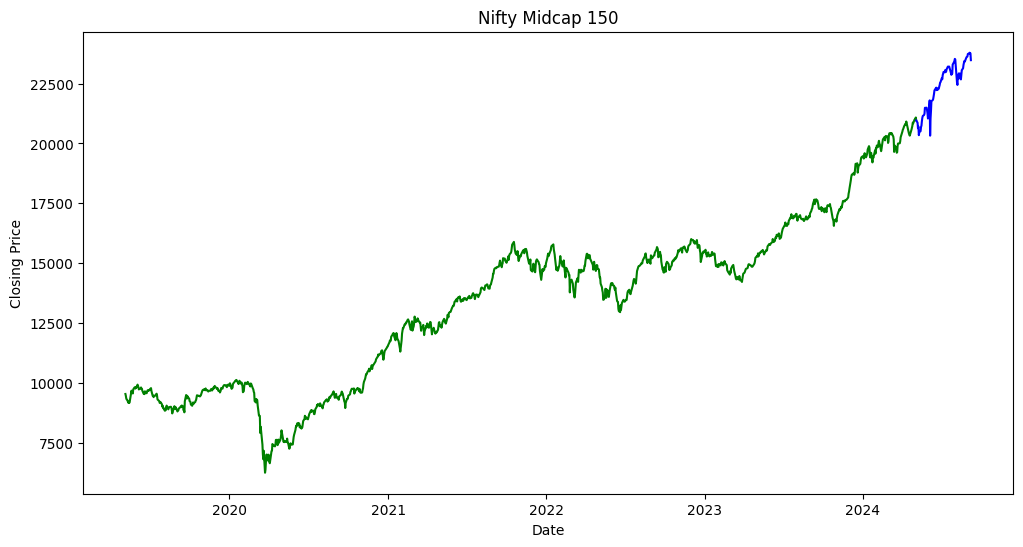

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(index_data['TIMESTAMP'].values, index_data['CLOSE_INDEX_VAL'].values, color='green')
plt.plot(index_data_new['TIMESTAMP'].values, index_data_new['CLOSE_INDEX_VAL'].values, color='blue')
plt.title('Nifty Midcap 150')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []

window_num = 7

for i in range(window_num, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-window_num:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

###Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
dir(regressor)

NameError: name 'regressor' is not defined

###Training

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0861
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0054
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0041
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0039
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0038
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0041
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0036
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0035
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0041
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0031
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0031
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0034
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0032
Epoch 14/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0030
Epoch 15/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step -

###Inference

In [ ]:
total_data = np.concatenate((training_set[len(training_set) - window_num:], test_set), axis=0)
total_data_scaled = sc.transform(total_data)

X_test = []
for i in range(window_num, len(total_data_scaled)):
    X_test.append(total_data_scaled[i-window_num:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step


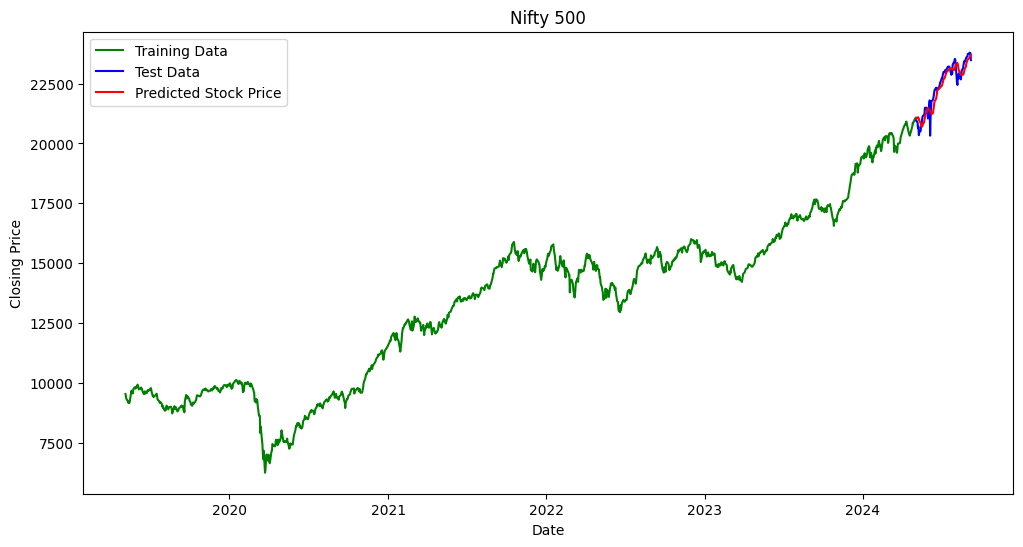

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(index_data['TIMESTAMP'].values, index_data['CLOSE_INDEX_VAL'].values, color='green', label='Training Data')
plt.plot(index_data_new['TIMESTAMP'].values, index_data_new['CLOSE_INDEX_VAL'].values, color='blue', label='Test Data')
plt.plot(index_data_new['TIMESTAMP'].values, predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Nifty 500')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig('nifty_500_window_20_epoch_100.png')
plt.show()

###Save Model & Graph

In [ ]:
regressor.save('nifty_500_window_20_epoch_100.keras')

In [ ]:
plt.savefig('nifty_500_window_20_epoch_100.png')

<Figure size 640x480 with 0 Axes>

###Load Model

In [ ]:
from keras.models import load_model
model_path = '/content/nifty_500_window_7_epoch_50.keras'
model = load_model(model_path)

###Inference

In [ ]:
total_data = np.concatenate((training_set[len(training_set) - window_num:], test_set), axis=0)
total_data_scaled = sc.transform(total_data)

X_test = []
for i in range(window_num, len(total_data_scaled)):
    X_test.append(total_data_scaled[i-window_num:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


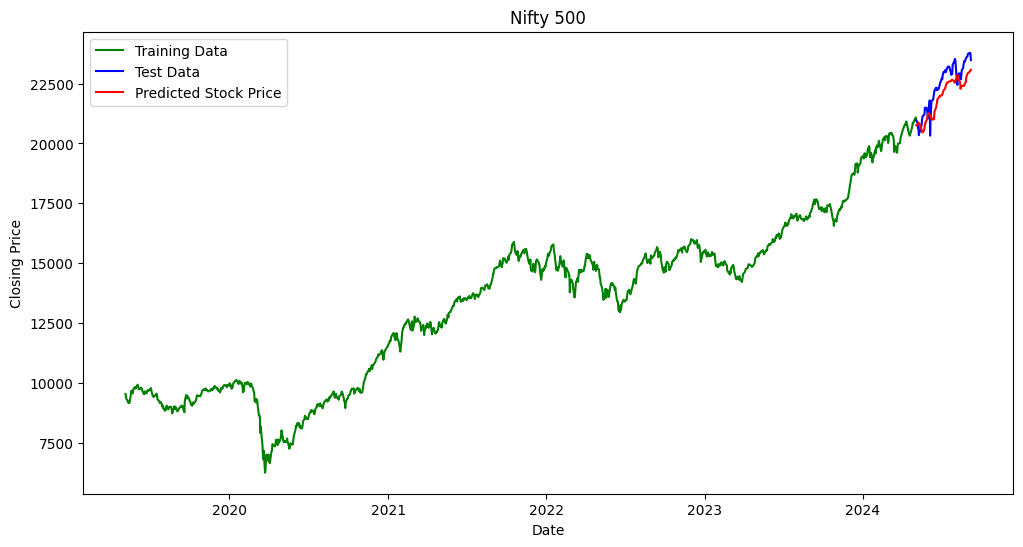

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(index_data['TIMESTAMP'].values, index_data['CLOSE_INDEX_VAL'].values, color='green', label='Training Data')
plt.plot(index_data_new['TIMESTAMP'].values, index_data_new['CLOSE_INDEX_VAL'].values, color='blue', label='Test Data')
plt.plot(index_data_new['TIMESTAMP'].values, predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Nifty 500')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
 plt.savefig('nifty_500_window_20_epoch_100.png')

<Figure size 640x480 with 0 Axes>